In [11]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [3]:
# Reading data from file
insurance_data = pd.read_csv("insurance_data.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
# Feature engineering 
X = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]

X = pd.get_dummies(X, columns=["region"], drop_first=True, dtype=int)

X["sex"] = X["sex"].map({"female": 1, "male": 0})
X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})

X["age_smoker"] = X["age"] * X["smoker"]
X["bmi_smoker"] = X["bmi"] * X["smoker"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

MSE for alpha = 0.001  20922599.87103596
MSE for alpha = 0.1  20921803.698431373
MSE for alpha = 1  20914832.635089133
MSE for alpha = 2  20908106.77995452
MSE for alpha = 5  20890881.000633497
MSE for alpha = 10  20872844.794796687
MSE for alpha = 30  20937537.133939777
MSE for alpha = 40  21046489.29389078
MSE for alpha = 100  22423172.686023258


<Axes: >

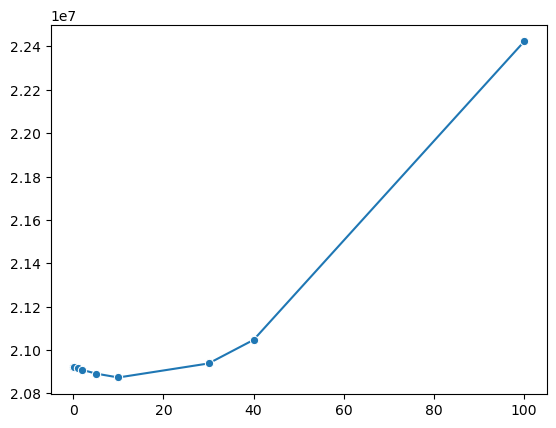

In [44]:
# Lasso Regression
alphas = [0.001, 0.1 ,1 ,2 ,5 ,10 ,30 ,40 ,100]
mses = []

for a in alphas:
    lasso_model = Lasso(alpha = a)
    lasso_model.fit(X_train , y_train)

    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test ,y_pred)
    print(f"MSE for alpha = {a} " , mse)
    mses.append(mse)

sns.lineplot(x= alphas , y = mses , marker = "o")

In [45]:
# Using LassoCV
from sklearn.linear_model import LassoCV
a =  [0.001, 0.1 ,1 ,2 ,5 ,10 ,30 ,40 ,100]

lasso_cv_model = LassoCV(
    alphas = a,
    cv = 5,
    max_iter = 1000,
    random_state = 42
)

lasso_cv_model.fit(X_train , y_train)
print("Best aplha value : " , lasso_cv_model.alpha_)

Best aplha value :  0.001
